In [1]:
import pandas as pd
import numpy as np
from path import Path
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
# Loading crime data
file_path = Path("Resources/sample_crime_data.csv")
df = pd.read_csv(file_path)
df = df.set_index("ID")
print(df.shape)
df.head()

(206997, 18)


,ID.1,Block,IUCR,Primary Type,Violence Status,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Date,Time
ID,,,,,,,,,,,,,,,,,,
6909918,12260346,070XX S EGGLESTON AVE,0486,BATTERY,VIOLENT,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,7.0,6.0,68.0,08B,2021,41.766435,-87.635964,2021-01-03,13:23:00
6927718,12263464,080XX S YALE AVE,0820,THEFT,NON-VIOLENT,$500 AND UNDER,RESIDENCE,False,False,6.0,17.0,44.0,06,2021,41.748474,-87.630607,2021-01-03,06:59:00
6927807,12259990,056XX W WASHINGTON BLVD,0486,BATTERY,VIOLENT,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,15.0,29.0,25.0,08B,2021,41.882224,-87.766076,2021-01-03,00:20:00
6931849,12260669,057XX S RACINE AVE,2022,NARCOTICS,NON-VIOLENT,POSSESS - COCAINE,STREET,True,False,7.0,16.0,67.0,18,2021,41.790069,-87.654769,2021-01-03,20:47:00
6931854,25702,068XX S STONY ISLAND AVE,0110,HOMICIDE,VIOLENT,FIRST DEGREE MURDER,STREET,False,False,3.0,5.0,43.0,01A,2021,41.771062,-87.586271,2021-01-03,20:09:00


In [3]:
df.dtypes

ID.1                      int64
Block                    object
IUCR                     object
Primary Type             object
Violence Status          object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
Date                     object
Time                     object
dtype: object

In [4]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
df[df_cat].nunique()

Block                   26955
IUCR                      300
Primary Type               31
Violence Status             2
Description               278
Location Description      126
FBI Code                   26
Date                      370
Time                     1450
dtype: int64

In [5]:
df = df.drop(columns=['ID.1', 'IUCR', 'Primary Type', 'Description', 'FBI Code','Block', 'Latitude', 'Longitude', 'Year','Time', 'Date'])
df = df.replace(np.nan,0)
df.head()

,Violence Status,Location Description,Arrest,Domestic,District,Ward,Community Area
ID,,,,,,,
6909918,VIOLENT,APARTMENT,False,True,7.0,6.0,68.0
6927718,NON-VIOLENT,RESIDENCE,False,False,6.0,17.0,44.0
6927807,VIOLENT,APARTMENT,False,True,15.0,29.0,25.0
6931849,NON-VIOLENT,STREET,True,False,7.0,16.0,67.0
6931854,VIOLENT,STREET,False,False,3.0,5.0,43.0


In [6]:
df['Violence Status'].value_counts()

NON-VIOLENT    135435
VIOLENT         71562
Name: Violence Status, dtype: int64

In [7]:
y = df['Violence Status']
X = df.drop(columns='Violence Status')
X = pd.get_dummies(X)

In [8]:
print(X.shape)
print(y.shape)
X.head()


(206997, 132)
(206997,)


,Arrest,Domestic,District,Ward,Community Area,Location Description_0,Location Description_ABANDONED BUILDING,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,...,Location Description_VACANT LOT / LAND,Location Description_VEHICLE - COMMERCIAL,Location Description_VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,Location Description_VEHICLE - COMMERCIAL: TROLLEY BUS,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_VESTIBULE,Location Description_WAREHOUSE,Location Description_YARD
ID,,,,,,,,,,,,,,,,,,,,,
6909918,False,True,7.0,6.0,68.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6927718,False,False,6.0,17.0,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6927807,False,True,15.0,29.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6931849,True,False,7.0,16.0,67.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6931854,False,False,3.0,5.0,43.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.describe()

,District,Ward,Community Area,Location Description_0,Location Description_ABANDONED BUILDING,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,...,Location Description_VACANT LOT / LAND,Location Description_VEHICLE - COMMERCIAL,Location Description_VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,Location Description_VEHICLE - COMMERCIAL: TROLLEY BUS,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_VESTIBULE,Location Description_WAREHOUSE,Location Description_YARD
count,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,...,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000,206997.000000
mean,11.276994,23.113026,37.138345,0.003459,0.000454,0.000203,0.000396,0.000227,0.000309,0.000193,...,0.002773,0.000787,0.000024,0.000005,0.000174,0.000478,0.012797,0.000014,0.000556,0.000082
std,7.001449,13.938650,21.666267,0.058711,0.021305,0.014243,0.019899,0.015067,0.017581,0.013900,...,0.052586,0.028051,0.004915,0.002198,0.013187,0.021864,0.112399,0.003807,0.023564,0.009062
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,24.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,34.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,50.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
y.value_counts()

NON-VIOLENT    135435
VIOLENT         71562
Name: Violence Status, dtype: int64

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [16]:
predictions

array(['NON-VIOLENT', 'NON-VIOLENT', 'NON-VIOLENT', ..., 'NON-VIOLENT',
       'NON-VIOLENT', 'VIOLENT'], dtype=object)

In [17]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Non-voilent", "Actual Violent"], columns=["Predicted Non-violent", "Predicted Violent"])

cm_df

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Non-violent,Predicted Violent
Actual Non-voilent,28761,5209
Actual Violent,8154,9626


Accuracy Score : 0.7417777777777778
Classification Report
              precision    recall  f1-score   support

 NON-VIOLENT       0.78      0.85      0.81     33970
     VIOLENT       0.65      0.54      0.59     17780

    accuracy                           0.74     51750
   macro avg       0.71      0.69      0.70     51750
weighted avg       0.73      0.74      0.74     51750



In [19]:
# clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [20]:
for feat, importance in sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1], reverse=True):
    print(f'{feat}: ({importance})')

Domestic: (0.33569847330049046)
Community Area: (0.13342564733296056)
Ward: (0.11833143848879614)
Location Description_SIDEWALK: (0.07657030987514374)
District: (0.06451695904127888)
Arrest: (0.05962958466660496)
Location Description_RESIDENCE: (0.018990520590138227)
Location Description_APARTMENT: (0.018029863652567164)
Location Description_STREET: (0.014024245795652318)
Location Description_RESIDENCE - GARAGE: (0.008300549028139226)
Location Description_ALLEY: (0.006453087820288239)
Location Description_HOSPITAL BUILDING / GROUNDS: (0.005772539633045616)
Location Description_SMALL RETAIL STORE: (0.005311053334875392)
Location Description_NURSING / RETIREMENT HOME: (0.005265801396071514)
Location Description_SCHOOL - PUBLIC GROUNDS: (0.005083009749942995)
Location Description_CTA TRAIN: (0.004532935897933244)
Location Description_CTA BUS: (0.004510362696723943)
Location Description_CTA PLATFORM: (0.004455006356903647)
Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL): (0.004

In [21]:
feature_importances = rf_model.feature_importances_

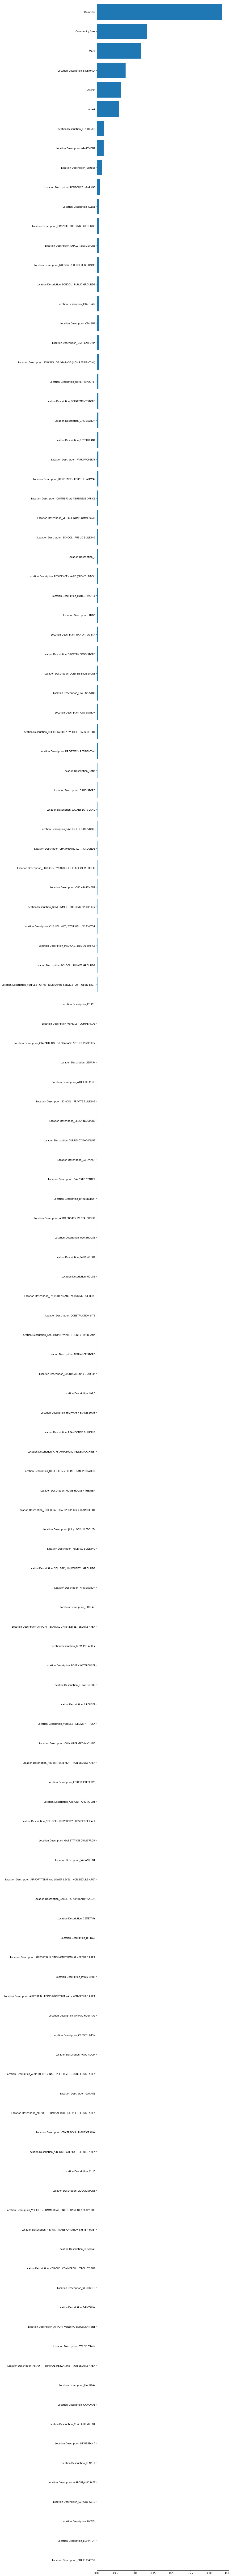

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()